**Importing Libraries**



* **numpy:** This library is used for numerical computations and array operations. It's commonly used in data preprocessing and manipulation tasks.

* **keras:** Keras is a high-level deep learning library that provides an easy-to-use interface for building neural networks. It's built on top of TensorFlow and provides functionalities for defining layers, compiling models, and training neural networks.

* **ImageDataGenerator from tensorflow.keras.preprocessing.image**: This class is used for data augmentation and preprocessing of image data. It allows you to generate batches of augmented data and perform real-time data augmentation during model training.

* Other imports like Dropout, Flatten, Dense, Sequential from keras.layers and keras.models are used for defining neural network architectures and layers





In [1]:
import numpy as np
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.src.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
utils.to_categorical


<function keras.src.utils.numerical_utils.to_categorical(x, num_classes=None)>

**Setting up Paths and Image Dimensions for Transfer Learning with Keras**

* The following part imports the math module, which provides mathematical functions and constants.

* We also define the dimensions for input images. In this case, the images are expected to have a width and height of 150 pixels each.

* **top_model_weights_path** sets the path where the weights of the top model will be saved after training. The .h5 extension indicates that the weights will be saved in the Hierarchical Data Format version 5 (HDF5) format, which is commonly used for saving deep learning model weights in Keras.

* **train_data_dir** points to the directory containing the training data, and v**alidation_data_dir** points to the directory containing the validation (or test) data.


In [8]:
#from tensorflow.keras.
import math

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.weights.h5'
train_data_dir = 'C:/Users/P_ORADIY/Downloads/archive/dataset/train'
validation_data_dir = 'C:/Users/P_ORADIY/Downloads/archive/dataset/test'


**Generating and saving bottleneck features using a pre-trained VGG16 model.**

First let us understand whgat are bottleneck feartures:

**Bottleneck features**, also known as bottleneck representations, are the intermediate layer outputs of a pre-trained deep learning model, such as VGG16. When using transfer learning, these models are typically pre-trained on large datasets like ImageNet for general feature extraction.

The term "bottleneck" refers to a layer in the pre-trained model where the input data passes through before reaching the final output layer. This layer has a lower dimensionality compared to the input data and serves as a compressed representation that captures essential features of the input.

Here's a detailed breakdown of the bottleneck function:

* **save_bottlebeck_features(batch_size):** This function is responsible for generating and saving bottleneck features.

* Load the pre-trained VGG16 model without the top layers (include_top=False) using applications.VGG16.

* Create an **ImageDataGenerator** object for preprocessing the image data by rescaling pixel values to the range [0, 1].

* Generate bottleneck features for the training and validation data using the VGG16 model and save these features to numpy files (bottleneck_features_train.npy and bottleneck_features_validation.npy).

* The batch_size parameter controls the batch size used during feature extraction.



In [9]:
def save_bottlebeck_features():
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    datagen = ImageDataGenerator(rescale=1. / 255)

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    print(len(generator.filenames))
    print(generator.class_indices)
    print(len(generator.class_indices))

    nb_train_samples = len(generator.filenames)
    num_classes = len(generator.class_indices)

    predict_size_train = int(math.ceil(nb_train_samples / batch_size))

    bottleneck_features_train = model.predict(
        generator, predict_size_train)

    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    nb_validation_samples = len(generator.filenames)

    predict_size_validation = int(
        math.ceil(nb_validation_samples / batch_size))

    bottleneck_features_validation = model.predict_generator(
        generator, predict_size_validation)

    np.save('bottleneck_features_validation.npy',
            bottleneck_features_validation)


**Training the model**


**train_top_model(batch_size, epochs)**: This function is responsible for training the top model using the extracted bottleneck features. Here's a detailed breakdown:

* Prepare data for training by loading the bottleneck features and their corresponding labels.

* A new neural network model is defined using Keras Sequential API. It consists of a Flatten layer followed by a Dense layer with ReLU activation and a Dropout layer to prevent overfitting. The output layer is a Dense layer with softmax activation for multi-class classification.

* Compile the model with an optimizer ('rmsprop') and a loss function ('categorical_crossentropy') suitable for multi-class classification tasks.

* Train the model using the bottleneck features and labels from the training data, and validate it using the validation data.

* Save the trained model weights to the specified path (top_model_weights_path).


Model evaluation is done using the evaluate method on the validation data.

Finally, the accuracy and loss of the model are printed.




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Found 43456 images belonging to 38 classes.
43456
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy'

C:\Users\P_ORADIY\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2716/2716 ━━━━━━━━━━━━━━━━━━━━ 937s 345ms/step
Found 10849 images belonging to 38 classes.
679/679 ━━━━━━━━━━━━━━━━━━━━ 234s 344ms/step
Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


C:\Users\P_ORADIY\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5482 - loss: 1.6596 - val_accuracy: 0.8319 - val_loss: 0.5116
Epoch 2/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7469 - loss: 0.8667 - val_accuracy: 0.8675 - val_loss: 0.4230
Epoch 3/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7714 - loss: 0.8323 - val_accuracy: 0.8702 - val_loss: 0.4587
Epoch 4/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7899 - loss: 0.7974 - val_accuracy: 0.8814 - val_loss: 0.4376
Epoch 5/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7953 - loss: 0.8122 - val_accuracy: 0.8804 - val_loss: 0.4739
Epoch 6/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7977 - loss: 0.7965 - val_accuracy: 0.8808 - val_loss: 0.4348
Epoch 7/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8059 - loss: 0.7952 - val_accuracy: 0.8787 - val_loss: 0.4590
Epoch 8/50
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8069 - loss: 0

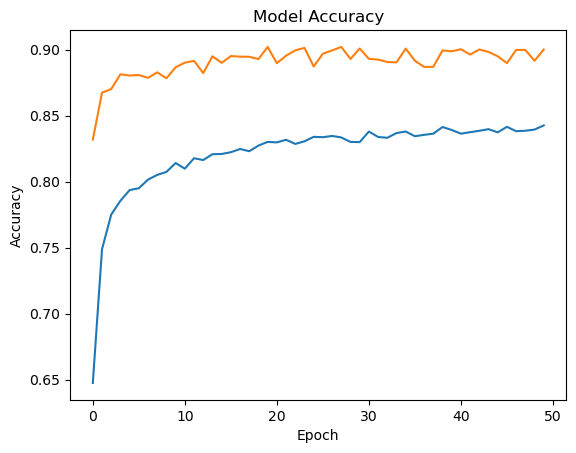

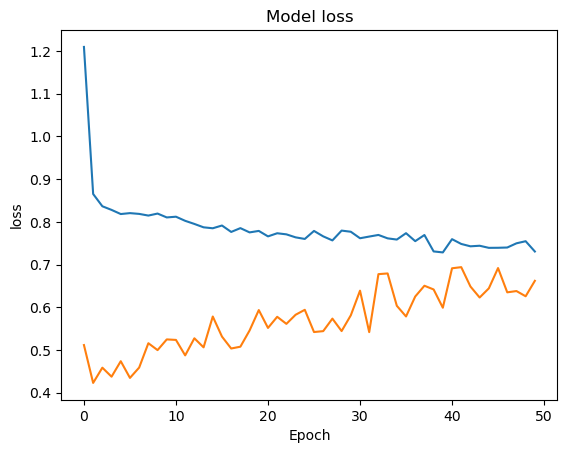

In [10]:
import numpy as np
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.src.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
import matplotlib.pyplot as plt

utils.to_categorical

# from tensorflow.keras.
import math

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.weights.h5'
train_data_dir = 'C:/Users/P_ORADIY/Downloads/archive/dataset/train'
validation_data_dir = 'C:/Users/P_ORADIY/Downloads/archive/dataset/test'

# number of epochs to train top model
epochs = 50
# batch size used by flow_from_directory and predict_generator
batch_size = 16


def save_bottlebeck_features():
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    datagen = ImageDataGenerator(rescale=1. / 255)

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    print(len(generator.filenames))
    print(generator.class_indices)
    print(len(generator.class_indices))

    nb_train_samples = len(generator.filenames)
    num_classes = len(generator.class_indices)

    predict_size_train = int(math.ceil(nb_train_samples / batch_size))

    bottleneck_features_train = model.predict(
        generator, predict_size_train)

    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    nb_validation_samples = len(generator.filenames)

    predict_size_validation = int(
        math.ceil(nb_validation_samples / batch_size))

    bottleneck_features_validation = model.predict_generator(
        generator, predict_size_validation)

    np.save('bottleneck_features_validation.npy',
            bottleneck_features_validation)


def save_bottlebeck_features(batch_size):
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    datagen = ImageDataGenerator(rescale=1. / 255)

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    print(len(generator.filenames))
    print(generator.class_indices)
    print(len(generator.class_indices))

    nb_train_samples = len(generator.filenames)
    num_classes = len(generator.class_indices)

    predict_size_train = int(math.ceil(nb_train_samples / batch_size))

    bottleneck_features_train = model.predict(
        generator, predict_size_train)

    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    nb_validation_samples = len(generator.filenames)

    predict_size_validation = int(
        math.ceil(nb_validation_samples / batch_size))

    bottleneck_features_validation = model.predict(
        generator, predict_size_validation)

    np.save('bottleneck_features_validation.npy',
            bottleneck_features_validation)


def train_top_model(batch_size, epochs):
    datagen_top = ImageDataGenerator(rescale=1. / 255)
    generator_top = datagen_top.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    nb_train_samples = len(generator_top.filenames)
    num_classes = len(generator_top.class_indices)

    # save the class indices to use use later in predictions
    np.save('class_indices.npy', generator_top.class_indices)

    train_data = np.load('bottleneck_features_train.npy')

    # get the class labels for the training data, in the original order
    train_labels = generator_top.classes

    train_labels = to_categorical(train_labels, num_classes=num_classes)

    generator_top = datagen_top.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    nb_validation_samples = len(generator_top.filenames)

    validation_data = np.load('bottleneck_features_validation.npy')

    validation_labels = generator_top.classes
    validation_labels = to_categorical(
        validation_labels, num_classes=num_classes)

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_data, train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(validation_data, validation_labels))

    model.save_weights(top_model_weights_path)

    (eval_loss, eval_accuracy) = model.evaluate(
        validation_data, validation_labels, batch_size=batch_size, verbose=1)

    print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
    print("[INFO] Loss: {}".format(eval_loss))
    # Compute predictions
    predictions = model.predict(validation_data)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(validation_labels, axis=1)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Compute classification report
    class_report = classification_report(true_classes, predicted_classes)
    print("\nClassification Report:")
    print(class_report)
    
    # Compute precision score
    precision = precision_score(true_classes, predicted_classes, average='weighted')
    print("\nWeighted Precision:", precision)
    
    # Compute F1 score
    f1 = f1_score(true_classes, predicted_classes, average='weighted')
    print("Weighted F1 Score:", f1)
    
    return history


# batch_size = 16  # Define batch size here
# save_bottlebeck_features(batch_size)
# train_top_model(batch_size)

batch_size = 16  # Define batch size here
epochs = 50  # Define number of epochs here

save_bottlebeck_features(batch_size)
history = train_top_model(batch_size, epochs)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()




**We think for our task, TensorFlow with Keras is better suited than scikit-learn**, as

*   The task involves working with CNNs, particularly
utilizing the VGG16 architecture. TensorFlow with Keras seamlessly integrates pre-trained CNN models like VGG16, making it easier to implement transfer learning and work with convolutional layers.

*   TensorFlow with Keras provides greater flexibility and customization options, allowing for easy customization of network architectures, loss functions, optimizers, and more.

Using TensorFlow with Keras provides a robust framework for training learning models to diagnose plant diseases with high accuracy and efficiency.